<a href="https://colab.research.google.com/github/shnehapaudyal/Classification-models/blob/main/SHNEHA_DMML_1_ANB_CPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_frame=pd.read_csv('/content/drive/MyDrive/MPOX/Monkeypox Coursework Dataset.csv')
drive.flush_and_unmount()
data_frame

Mounted at /content/drive


,Test ID,Systemic Illness,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Age,Month of Birth,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,AA0021,None,0.0,0.0,1,1.0,1,0,1.0,0.0,5363690,9382,1,37,10,0,0.0,Negative
1,AA0022,Fever,1.0,1.0,0,1.0,1,0,0.0,1.0,5797376,7891,0,24,7,1,0.0,Positive
2,AA0023,Fever,1.0,0.0,1,1.0,0,0,0.0,1.0,4509503,9424,0,34,11,1,0.0,Positive
3,AA0024,None,0.0,1.0,0,0.0,0,1,1.0,1.0,4613306,4608,1,40,3,0,0.0,Positive
4,AA0025,Swollen Lymph Nodes,3.0,1.0,1,1.0,0,0,1.0,1.0,5423126,10668,1,36,8,0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,AH33692,None,0.0,1.0,1,0.0,1,1,0.0,0.0,5774935,9537,1,56,1,0,1.0,Positive
24996,AH33693,Fever,1.0,0.0,1,1.0,0,1,1.0,1.0,4719924,7596,1,50,10,1,1.0,Positive
24997,AH33694,None,0.0,1.0,1,0.0,0,1,1.0,0.0,4254616,10949,0,24,12,1,0.0,Positive
24998,AH33695,Swollen Lymph Nodes,3.0,0.0,1,0.0,1,1,1.0,0.0,5440155,6006,1,56,9,1,0.0,Negative


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Test ID                         25000 non-null  object 
 1   Systemic Illness                24998 non-null  object 
 2   Encoded Systemic Illness        24998 non-null  float64
 3   Rectal Pain                     24997 non-null  float64
 4   Sore Throat                     25000 non-null  int64  
 5   Penile Oedema                   24994 non-null  float64
 6   Oral Lesions                    24996 non-null  object 
 7   Solitary Lesion                 25000 non-null  int64  
 8   Swollen Tonsils                 24993 non-null  float64
 9   HIV Infection                   24995 non-null  float64
 10  Red blood cells count           25000 non-null  int64  
 11  White blood cells count         25000 non-null  int64  
 12  Home ownership                  

Descriptive Statistical measures of a Data Frame

In [ ]:
data_frame = data_frame.drop(columns = [ 'Test ID', 'Systemic Illness', 'Month of Birth', 'Home ownership', 'White blood cells count', 'Red blood cells count', 'Health Insurance'])

In [ ]:
data_frame

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Age,Sexually Transmitted Infection,MPOX PCR Result
0,0.0,0.0,1,1.0,1,0,1.0,0.0,37,0.0,Negative
1,1.0,1.0,0,1.0,1,0,0.0,1.0,24,0.0,Positive
2,1.0,0.0,1,1.0,0,0,0.0,1.0,34,0.0,Positive
3,0.0,1.0,0,0.0,0,1,1.0,1.0,40,0.0,Positive
4,3.0,1.0,1,1.0,0,0,1.0,1.0,36,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,1.0,1,0.0,1,1,0.0,0.0,56,1.0,Positive
24996,1.0,0.0,1,1.0,0,1,1.0,1.0,50,1.0,Positive
24997,0.0,1.0,1,0.0,0,1,1.0,0.0,24,0.0,Positive
24998,3.0,0.0,1,0.0,1,1,1.0,0.0,56,0.0,Negative


In [ ]:
data_frame.describe()

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
count,24998.000000,24997.000000,25000.000000,24994.000000,25000.000000,24993.000000,24995.000000,24996.000000
mean,1.497640,0.493819,0.502160,0.504441,0.501080,0.501260,0.503301,0.497880
std,1.116872,0.499972,0.500005,0.499990,0.500009,0.500008,0.499999,0.500006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Encoded Systemic Illness        24998 non-null  float64
 1   Rectal Pain                     24997 non-null  float64
 2   Sore Throat                     25000 non-null  int64  
 3   Penile Oedema                   24994 non-null  float64
 4   Oral Lesions                    24996 non-null  object 
 5   Solitary Lesion                 25000 non-null  int64  
 6   Swollen Tonsils                 24993 non-null  float64
 7   HIV Infection                   24995 non-null  float64
 8   Age                             24964 non-null  object 
 9   Sexually Transmitted Infection  24996 non-null  float64
 10  MPOX PCR Result                 25000 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 2.1+ MB


In [ ]:
data_frame.isnull().sum()

Encoded Systemic Illness           2
Rectal Pain                        3
Sore Throat                        0
Penile Oedema                      6
Oral Lesions                       4
Solitary Lesion                    0
Swollen Tonsils                    7
HIV Infection                      5
Age                               36
Sexually Transmitted Infection     4
MPOX PCR Result                    0
dtype: int64

In [ ]:
data_frame.isna().sum()/len(data_frame)*100

Encoded Systemic Illness          0.008
Rectal Pain                       0.012
Sore Throat                       0.000
Penile Oedema                     0.024
Oral Lesions                      0.016
Solitary Lesion                   0.000
Swollen Tonsils                   0.028
HIV Infection                     0.020
Age                               0.144
Sexually Transmitted Infection    0.016
MPOX PCR Result                   0.000
dtype: float64

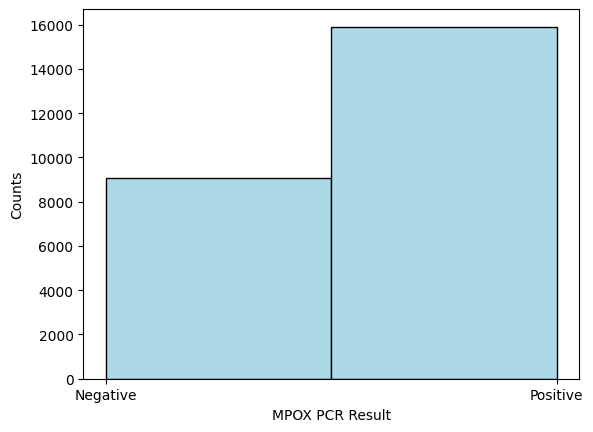

In [ ]:
plt.hist(data_frame['MPOX PCR Result'], bins=2, color=['lightblue'], edgecolor='k')
plt.xlabel('MPOX PCR Result')
plt.ylabel('Counts')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

In [ ]:
# # Replaced the values  with mode for ESI
# mode_esi = data_frame['Encoded Systemic Illness'].mode()[0]
# data_frame['Encoded Systemic Illness'].fillna(mode_esi, inplace=True)

# # Replaced the values  with mode for Rectal Pain
# mode_rp = data_frame['Rectal Pain'].mode()[0]
# data_frame['Rectal Pain'].fillna(mode_rp, inplace=True)

# mode_ol = data_frame['Oral Lesions'].mode()[0]
# data_frame['Oral Lesions'].fillna(mode_ol, inplace=True)

# mode_sti = data_frame['Sexually Transmitted Infection'].mode()[0]
# data_frame['Sexually Transmitted Infection'].fillna(mode_sti, inplace=True)

# mode_po = data_frame['Penile Oedema'].mode()[0]
# data_frame['Penile Oedema'].fillna(mode_po, inplace=True)

# mode_st = data_frame['Swollen Tonsils'].mode()[0]
# data_frame['Swollen Tonsils'].fillna(mode_st, inplace=True)

# mode_hi = data_frame['HIV Infection'].mode()[0]
# data_frame['HIV Infection'].fillna(mode_hi, inplace=True)

# 'Replaced NA with mode'

In [ ]:
data_frame.isnull().sum()

Encoded Systemic Illness           2
Rectal Pain                        3
Sore Throat                        0
Penile Oedema                      6
Oral Lesions                       4
Solitary Lesion                    0
Swollen Tonsils                    7
HIV Infection                      5
Age                               36
Sexually Transmitted Infection     4
MPOX PCR Result                    0
dtype: int64

In [ ]:
columns_to_fill = data_frame.columns.difference(['Age'])

# Replace empty values with the mode for columns excluding 'age'
data_frame[columns_to_fill] = data_frame[columns_to_fill].apply(lambda col: col.fillna(col.mode().iloc[0]))
data_frame.isnull().sum()

Encoded Systemic Illness           0
Rectal Pain                        0
Sore Throat                        0
Penile Oedema                      0
Oral Lesions                       0
Solitary Lesion                    0
Swollen Tonsils                    0
HIV Infection                      0
Age                               36
Sexually Transmitted Infection     0
MPOX PCR Result                    0
dtype: int64

In [ ]:
data_frame.isnull().sum()

Encoded Systemic Illness           0
Rectal Pain                        0
Sore Throat                        0
Penile Oedema                      0
Oral Lesions                       0
Solitary Lesion                    0
Swollen Tonsils                    0
HIV Infection                      0
Age                               36
Sexually Transmitted Infection     0
MPOX PCR Result                    0
dtype: int64

In [ ]:
data_frame.mode()

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Age,Sexually Transmitted Infection,MPOX PCR Result
0,1.0,0.0,1,1.0,0,1,1.0,1.0,47,0.0,Positive


In [ ]:
column_ol = 'MPOX PCR Result'
data_frame[column_ol].unique()

array(['Negative', 'Positive'], dtype=object)

In [ ]:
# Replacing the categorical value to binary for oral lesion
# df_original = data_frame.copy()
columns_with_numeric = [
    'Oral Lesions', 'Age', 'MPOX PCR Result'
]

map_values = {'YES': '1', 'No': '0', 'Twenty': '20', '-23': '23', 'Positive': '1', 'Negative': '0'}
data_frame[columns_with_numeric] = data_frame[columns_with_numeric].replace(map_values)
data_frame[columns_with_numeric] = data_frame[columns_with_numeric].apply(lambda col: pd.to_numeric(col, errors='coerce').astype('Int64'))

In [ ]:
# Replacing the invalid data value for age
column_age = 'Age'
data_frame[column_age].unique()

<IntegerArray>
[  37,   24,   34,   40,   36,   30,   23,   41,   32,   46,   27,   47,   53,
   31,   25,   26,   52,   51,   56,   39,   61,   35,   50,   58,   33,   28,
   45, <NA>,   59,   38,   57,   54,   55,   43,   60,   42,   44,   48,   49,
   29,  150,    0,   20,  181]
Length: 44, dtype: Int64

In [ ]:
# Calculate the Inter Quartile Range for the 'Age' column
Q1 = data_frame['Age'].quantile(0.25)
Q3 = data_frame['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
(lower_bound, upper_bound)

(2.0, 82.0)

In [ ]:
# Replacing the missing values in Age
data_frame = data_frame[(data_frame['Age'] >= lower_bound) & (data_frame['Age'] <= upper_bound)]

In [ ]:
data_frame[column_age].unique()

<IntegerArray>
[37, 24, 34, 40, 36, 30, 23, 41, 32, 46, 27, 47, 53, 31, 25, 26, 52, 51, 56,
 39, 61, 35, 50, 58, 33, 28, 45, 59, 38, 57, 54, 55, 43, 60, 42, 44, 48, 49,
 29, 20]
Length: 40, dtype: Int64

In [ ]:
len(data_frame['Age'])

24961

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24961 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Encoded Systemic Illness        24961 non-null  float64
 1   Rectal Pain                     24961 non-null  float64
 2   Sore Throat                     24961 non-null  int64  
 3   Penile Oedema                   24961 non-null  float64
 4   Oral Lesions                    24961 non-null  Int64  
 5   Solitary Lesion                 24961 non-null  int64  
 6   Swollen Tonsils                 24961 non-null  float64
 7   HIV Infection                   24961 non-null  float64
 8   Age                             24961 non-null  Int64  
 9   Sexually Transmitted Infection  24961 non-null  float64
 10  MPOX PCR Result                 24961 non-null  Int64  
dtypes: Int64(3), float64(6), int64(2)
memory usage: 2.4 MB


In [ ]:
data_frame.shape

(24961, 11)

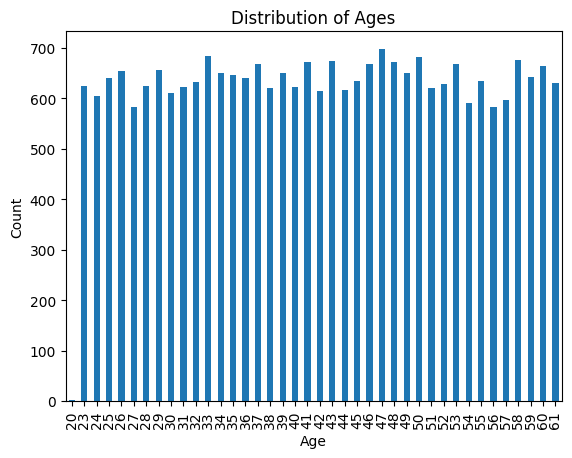

In [ ]:
pd.to_numeric(data_frame['Age'], errors='coerce').dropna().value_counts().sort_index().plot(kind='bar')
# Show the plot
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

In [ ]:
data_frame["Age"] = (data_frame["Age"] - data_frame["Age"].min()) / (data_frame["Age"].max() - data_frame["Age"].min())
data_frame["Age"]

<ipython-input-28-6ee8a06d766c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["Age"] = (data_frame["Age"] - data_frame["Age"].min()) / (data_frame["Age"].max() - data_frame["Age"].min())


0        0.414634
1        0.097561
2        0.341463
3        0.487805
4        0.390244
           ...   
24995    0.878049
24996    0.731707
24997    0.097561
24998    0.878049
24999    0.658537
Name: Age, Length: 24961, dtype: Float64

In [ ]:
feature_columns = ['Encoded Systemic Illness',	'Rectal Pain',	'Sore Throat',	'Penile Oedema',	'Oral Lesions',	'Solitary Lesion',	'Swollen Tonsils',	'HIV Infection',	'Age',	'Sexually Transmitted Infection']
mpox_pcr_result = data_frame['MPOX PCR Result']

In [ ]:
dataset = data_frame[feature_columns]
dataset

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Age,Sexually Transmitted Infection
0,0.0,0.0,1,1.0,1,0,1.0,0.0,0.414634,0.0
1,1.0,1.0,0,1.0,1,0,0.0,1.0,0.097561,0.0
2,1.0,0.0,1,1.0,0,0,0.0,1.0,0.341463,0.0
3,0.0,1.0,0,0.0,0,1,1.0,1.0,0.487805,0.0
4,3.0,1.0,1,1.0,0,0,1.0,1.0,0.390244,0.0
...,...,...,...,...,...,...,...,...,...,...
24995,0.0,1.0,1,0.0,1,1,0.0,0.0,0.878049,1.0
24996,1.0,0.0,1,1.0,0,1,1.0,1.0,0.731707,1.0
24997,0.0,1.0,1,0.0,0,1,1.0,0.0,0.097561,0.0
24998,3.0,0.0,1,0.0,1,1,1.0,0.0,0.878049,0.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, mpox_pcr_result, test_size=0.2, random_state=42, stratify=mpox_pcr_result)
((x_train.shape, y_train.shape), (x_test.shape, y_test.shape))

(((19968, 10), (19968,)), ((4993, 10), (4993,)))

In [ ]:

class Model:
  def __init__(self, model, name, x_train, y_train, x_test, y_test):
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test

    self.modelName = name
    self.model = model

  def predict(self):
    self.model.fit(x_train, y_train)
    prediction=self.model.predict(x_test)
    return prediction

  def confusion(self):
    return confusion_matrix(self.y_test, self.predict())

  def confusion_plot(self):
    cnf_matrix_lr = confusion_matrix(self.y_test, self.predict())
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots(figsize=(6, 4))
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, fontsize=14)
    plt.yticks(tick_marks, class_names, fontsize=14)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix of {}'.format(self.modelName), y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return plt

  def metrics(self):
    y_test = self.y_test
    y_pred = self.predict()

    output = {}
    output['accuracy'] = accuracy_score(y_test, y_pred)
    output['recall'] = recall_score(y_test, y_pred)
    output['precision'] = precision_score(y_test, y_pred)
    output['f1_score'] = f1_score(y_test,y_pred)
    output['roc_auc_score'] = roc_auc_score(y_test,y_pred)
    output['name'] = self.modelName
    return output

def LR(x_train, y_train, x_test, y_test):
  from sklearn.linear_model import LogisticRegression
  return Model(LogisticRegression, x_train.copy(), y_train.copy(), x_test.copy(), y_test.copy())


def GetModel(model, name, x_train, y_train, x_test, y_test):
  return Model(model, name, x_train.copy(), y_train.copy(), x_test.copy(), y_test.copy())


[['LogisticRegression',
  0.6731423993591027,
  0.8993077407174324,
  0.6853717026378897,
  0.7778987479586281,
  0.5882213634716638,
  array([[ 503, 1312],
         [ 320, 2858]]),
  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>],
 ['DecisionTree',
  0.5794111756459043,
  0.6375078665827565,
  0.6812373907195696,
  0.6586475942782836,
  0.5575969084979898,
  array([[ 867,  948],
         [1150, 2028]]),
  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>],
 ['SVM',
  0.6901662327258161,
  0.9257394587791064,
  0.6917470021161533,
  0.7918180594805543,
  0.6017127045961648,
  array([[ 504, 1311],
         [ 236, 2942]]),
  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>],
 ['KNeighbors',
  0.6168636090526738,
  0.7363121460037759,
  0.6852122986822841,
  0.7098437736993781,
  0.5720128223131827,
  array([[ 740, 1075],
         [ 838, 2340]])

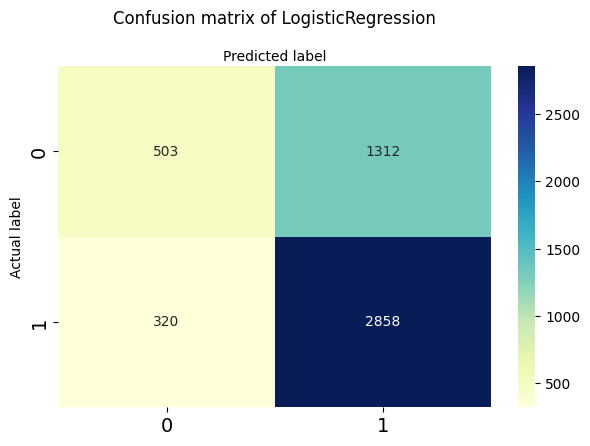

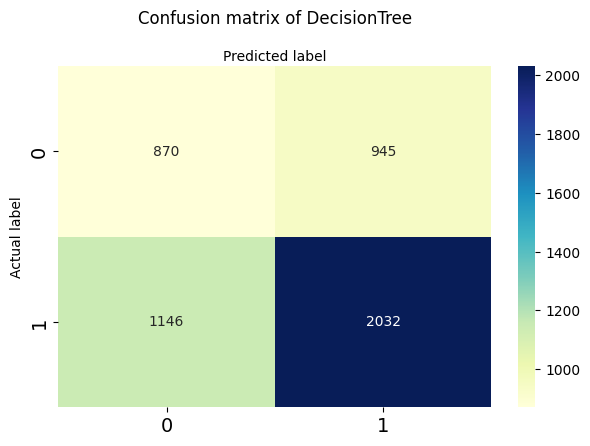

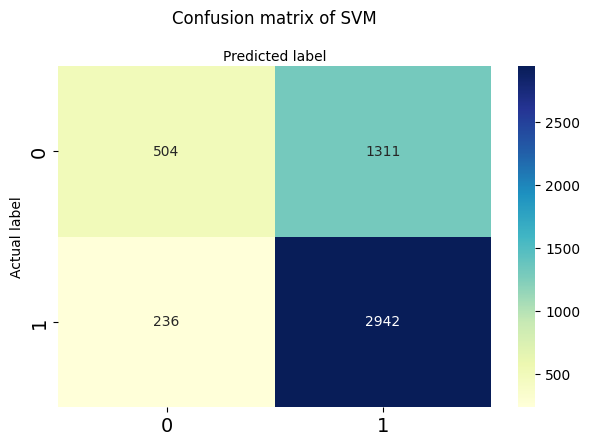

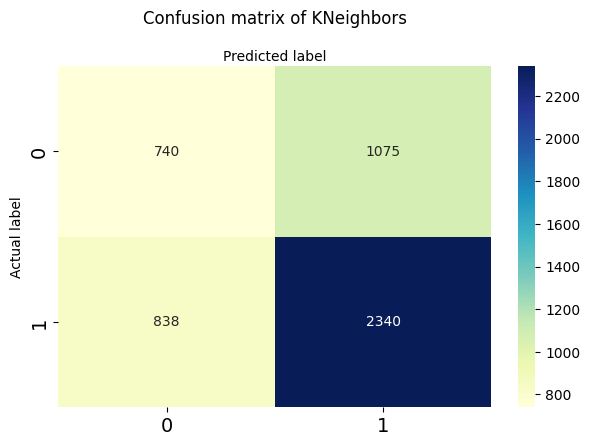

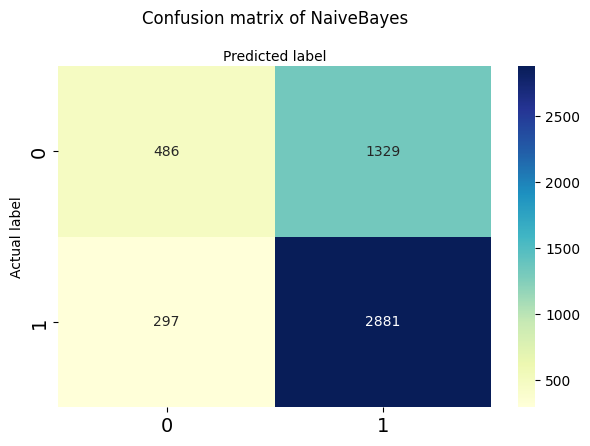

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

logreg = GetModel(LogisticRegression(), "LogisticRegression", x_train, y_train, x_test, y_test)
dt = GetModel(DecisionTreeClassifier(), "DecisionTree", x_train, y_train, x_test, y_test)
knn = GetModel(KNeighborsClassifier(n_neighbors = 3), "KNeighbors", x_train, y_train, x_test, y_test)
svm = GetModel(SVC(kernel='rbf'), "SVM", x_train, y_train, x_test, y_test)
nb = GetModel(GaussianNB(), "NaiveBayes", x_train, y_train, x_test, y_test)

model_results = []
for model in [logreg, dt, svm, knn, nb]:
  res = model.metrics()
  model_results.append([model.modelName, res['accuracy'], res['recall'], res['precision'], res['f1_score'], res['roc_auc_score'], model.confusion(), model.confusion_plot()])

model_results

In [ ]:
result = pd.DataFrame(data=model_results, columns=['Model', 'Accuracy', 'Recall','Precision', 'F1 Score', 'AUC-ROC', 'Confusion', 'Plot'])
result.get(['Model', 'Plot'])

,Model,Plot
0,LogisticRegression,<module 'matplotlib.pyplot' from '/usr/local/l...
1,DecisionTree,<module 'matplotlib.pyplot' from '/usr/local/l...
2,SVM,<module 'matplotlib.pyplot' from '/usr/local/l...
3,KNeighbors,<module 'matplotlib.pyplot' from '/usr/local/l...
4,NaiveBayes,<module 'matplotlib.pyplot' from '/usr/local/l...


In [ ]:
result

,Model,Accuracy,Recall,Precision,F1 Score,AUC-ROC,Confusion,Plot
0,LogisticRegression,0.673142,0.899308,0.685372,0.777899,0.588221,"[[503, 1312], [320, 2858]]",<module 'matplotlib.pyplot' from '/usr/local/l...
1,DecisionTree,0.579411,0.637508,0.681237,0.658648,0.557597,"[[867, 948], [1150, 2028]]",<module 'matplotlib.pyplot' from '/usr/local/l...
2,SVM,0.690166,0.925739,0.691747,0.791818,0.601713,"[[504, 1311], [236, 2942]]",<module 'matplotlib.pyplot' from '/usr/local/l...
3,KNeighbors,0.616864,0.736312,0.685212,0.709844,0.572013,"[[740, 1075], [838, 2340]]",<module 'matplotlib.pyplot' from '/usr/local/l...
4,NaiveBayes,0.674344,0.906545,0.684323,0.779913,0.587157,"[[486, 1329], [297, 2881]]",<module 'matplotlib.pyplot' from '/usr/local/l...


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}

# Create an SVM model with RBF kernel
svm_model = SVC(kernel='rbf')

# Use StratifiedKFold for maintaining class distribution in each fold
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=cv_stratified)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Retrain the SVM model with the best hyperparameters on the entire training set
svm_best = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_best.fit(x_train, y_train)

# Use k-fold cross-validation to assess model performance
cv_scores = cross_val_score(svm_best, x_train, y_train, cv=cv_stratified)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Evaluate the model on the test set
y_pred = svm_best.predict(x_test)
cm_svm_best = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the test set metrics
print("Tuned SVM Confusion Matrix:\n", cm_svm_best)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Best Hyperparameters: {'C': 100, 'gamma': 0.1}
Cross-Validation Scores: [0.68252379 0.6762644  0.68152228 0.69120962 0.69095918]
Mean CV Score: 0.6844958522180968
Tuned SVM Confusion Matrix:
 [[ 564 1251]
 [ 270 2908]]
Accuracy: 0.695373522932105
Precision: 0.6992065400336619
Recall: 0.9150409062303335
F1 Score: 0.7926945618100041
ROC AUC Score: 0.6128923539416131


In [ ]:
print('svm: {}'.format(svm_best.score(x_test, y_test)))
print('nb: {}'.format(nb.model.score(x_test, y_test)))

svm: 0.695373522932105
nb: 0.6743440817144002


In [ ]:
# Voting
from sklearn.ensemble import VotingClassifier

#create a dictionary of our base learner models
base_learners=[('svm', svm.model), ('nb', nb.model)]

#create our voting classifier, inputting our models
ensemble_learner = VotingClassifier(base_learners, voting='hard')

#fit model to training data
ensemble_learner.fit(x_train, y_train)

#test our model on the test data
model_accuracy = ensemble_learner.score(x_test, y_test)
model_accuracy


0.6815541758461846

In [ ]:
y_pred = ensemble_learner.predict(x_test)
Confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of ensembled model:\n", Confusion)

Confusion Matrix of ensembled model:
 [[ 657 1158]
 [ 432 2746]]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1 score",metrics.f1_score(y_test,y_pred))
print("AUC_ROC",metrics.roc_auc_score(y_test,y_pred))

Accuracy: 0.6815541758461846
Recall: 0.8640654499685336
Precision: 0.7033811475409836
f1 score 0.7754871505224513
AUC_ROC 0.6130244605214569
